# NOTEBOOK D'EXPLOITATION DES MODELES ENTRAINES
Dans ce notebook on... exploite des modèles préentrainés.
Un modèle préentrainé est disponible à l'[adresse suivante](https://filesender.renater.fr/?s=download&token=413fa625-51f0-bd9e-67c3-979f9440dbb4).
Il a été généré avec la commande ```python VAE_MNIST.py --cuda```.

Amusez vous les cocos on est là pour ça.

In [88]:
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import transforms
model = torch.load("model_reduced_sum.torch", map_location="cpu")

In [89]:
testset = MNIST(root='./MNIST/',
                train=False,
                transform=transforms.ToTensor(),
                download=True)

In [94]:
img = testset[10][0]

In [95]:
def show(img):
    plt.imshow(img.squeeze(0).detach().numpy(), cmap="Greys")

In [96]:
logvar, mu = model.encode(img)
z = model.sample(logvar,mu)
rec = model.decode(z).squeeze(0)

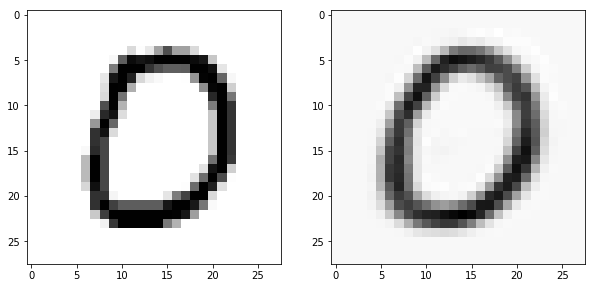

In [97]:
plt.figure(figsize=(10,10))
plt.subplot(121)
show(img)
plt.subplot(122)
show(rec)
plt.show()